In [303]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Dense comparison

In [304]:
mrr_original = {
    "arabic": 0.291,
    "bengali": 0.291,
    "english": 0.291,
    "finnish": 0.206,
    "indonesian": 0.271,
    "japanese": 0.213,
    "korean": 0.235,
    "russian": 0.283,
    "swahili": 0.189,
    "telugu": 0.111,
    "thai": 0.172
}

In [305]:
recall_original = {
    "arabic": 0.650,
    "bengali": 0.779,
    "english": 0.678,
    "finnish": 0.568,
    "indonesian": 0.685,
    "japanese": 0.584,
    "korean": 0.533,
    "russian": 0.647,
    "swahili": 0.528,
    "telugu": 0.366,
    "thai": 0.515
}

In [306]:
mrr_mdpr = {
    "arabic": 0.2666,
    "bengali": 0.2861,
    "english": 0.2750,
    "finnish": 0.2117,
    "indonesian": 0.3092,
    "japanese": 0.2413,
    "korean": 0.2206,
    "russian": 0.2839,
    "swahili": 0.1934,
    "telugu": 0.1056,
    "thai": 0.1567
}

In [307]:
recall_mdpr = {
    "arabic": 0.6580,
    "bengali": 0.7162,
    "english": 0.7173,
    "finnish": 0.6066,
    "indonesian": 0.7425,
    "japanese": 0.6319,
    "korean": 0.5424,
    "russian": 0.6621,
    "swahili": 0.4918,
    "telugu": 0.3870,
    "thai": 0.4766
}

In [308]:
# put all into pd dataframe
df = pd.DataFrame({
    "mrr_original": mrr_original,
    "mrr_mdpr": mrr_mdpr,
    "recall_original": recall_original,
    "recall_mdpr": recall_mdpr
})

In [309]:
df

,mrr_original,mrr_mdpr,recall_original,recall_mdpr
arabic,0.291,0.2666,0.650,0.6580
bengali,0.291,0.2861,0.779,0.7162
english,0.291,0.2750,0.678,0.7173
finnish,0.206,0.2117,0.568,0.6066
indonesian,0.271,0.3092,0.685,0.7425
japanese,0.213,0.2413,0.584,0.6319
korean,0.235,0.2206,0.533,0.5424
russian,0.283,0.2839,0.647,0.6621
swahili,0.189,0.1934,0.528,0.4918
telugu,0.111,0.1056,0.366,0.3870


In [310]:
df.describe()

,mrr_original,mrr_mdpr,recall_original,recall_mdpr
count,11.000000,11.000000,11.000000,11.000000
mean,0.232091,0.231827,0.593909,0.602945
std,0.059750,0.061961,0.110718,0.114619
min,0.111000,0.105600,0.366000,0.387000
25%,0.197500,0.202550,0.530500,0.517100
50%,0.235000,0.241300,0.584000,0.631900
75%,0.287000,0.279450,0.664000,0.689150
max,0.291000,0.309200,0.779000,0.742500


In [311]:
# add mean row
df.loc["mean"] = df.mean()
df

,mrr_original,mrr_mdpr,recall_original,recall_mdpr
arabic,0.291000,0.266600,0.650000,0.658000
bengali,0.291000,0.286100,0.779000,0.716200
english,0.291000,0.275000,0.678000,0.717300
finnish,0.206000,0.211700,0.568000,0.606600
indonesian,0.271000,0.309200,0.685000,0.742500
japanese,0.213000,0.241300,0.584000,0.631900
korean,0.235000,0.220600,0.533000,0.542400
russian,0.283000,0.283900,0.647000,0.662100
swahili,0.189000,0.193400,0.528000,0.491800
telugu,0.111000,0.105600,0.366000,0.387000


## Differences

In [312]:
df_difference = df.copy()
df_difference["mrr_difference_mdpr_better"] = df_difference["mrr_mdpr"] - df_difference["mrr_original"]
df_difference["recall_difference_mdpr_better"] = df_difference["recall_mdpr"] - df_difference["recall_original"]
df_difference[['mrr_difference_mdpr_better', 'recall_difference_mdpr_better']]

,mrr_difference_mdpr_better,recall_difference_mdpr_better
arabic,-0.024400,0.008000
bengali,-0.004900,-0.062800
english,-0.016000,0.039300
finnish,0.005700,0.038600
indonesian,0.038200,0.057500
japanese,0.028300,0.047900
korean,-0.014400,0.009400
russian,0.000900,0.015100
swahili,0.004400,-0.036200
telugu,-0.005400,0.021000


In [313]:
df_difference[['mrr_difference_mdpr_better', 'recall_difference_mdpr_better']].describe()

,mrr_difference_mdpr_better,recall_difference_mdpr_better
count,12.000000,12.000000
mean,-0.000264,0.009036
std,0.018236,0.037279
min,-0.024400,-0.062800
25%,-0.014625,-0.003050
50%,-0.002582,0.012250
75%,0.004725,0.038775
max,0.038200,0.057500


In [314]:
df_difference.loc["mean"] = df_difference.mean()

## Plot

In [315]:
plt.rcParams["figure.figsize"] = (12, 8)

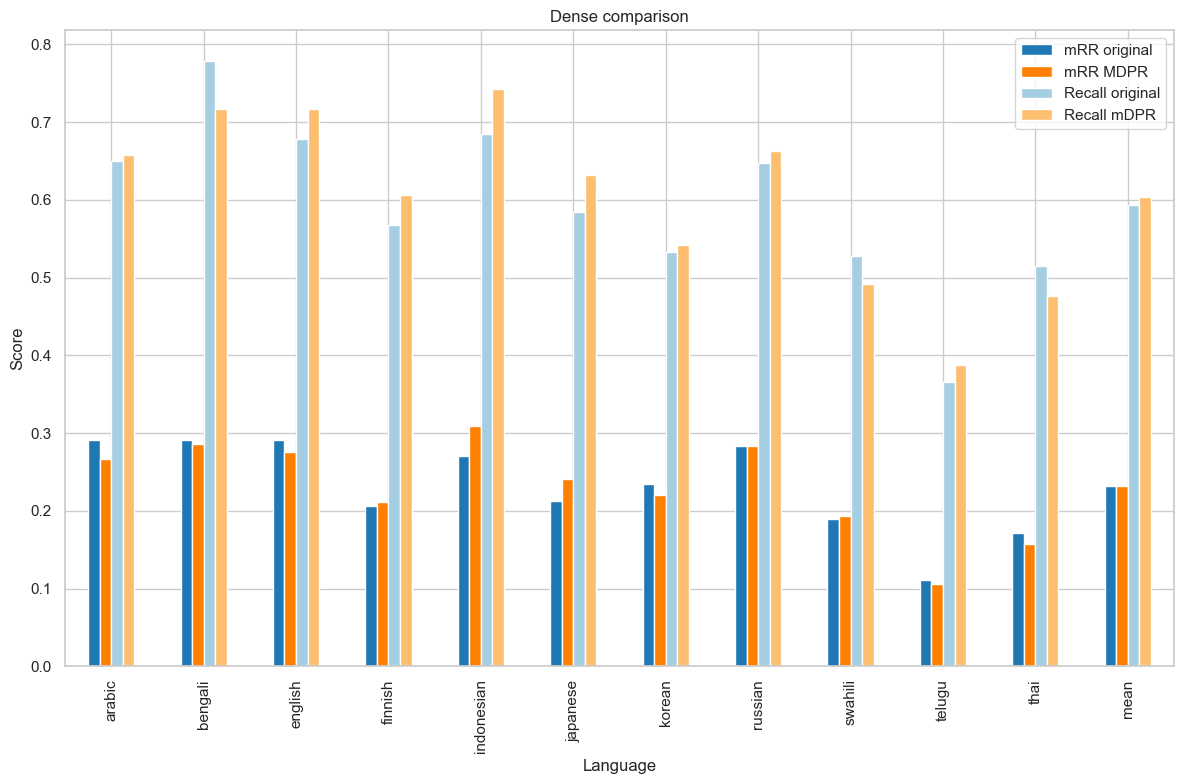

In [316]:
# light blue, light orange, dark blue, dark orange
df.plot.bar(color=['#1f78b4', '#ff7f00', '#a6cee3', '#fdbf6f', ])
# change colors of columns plotted

plt.title("Dense comparison")
plt.xlabel("Language")
plt.ylabel("Score")
plt.legend(["mRR original", "mRR MDPR", "Recall original", "Recall mDPR"])


plt.tight_layout()
plt.savefig("plots/dense_comparison_mdpr.png",  dpi=300)

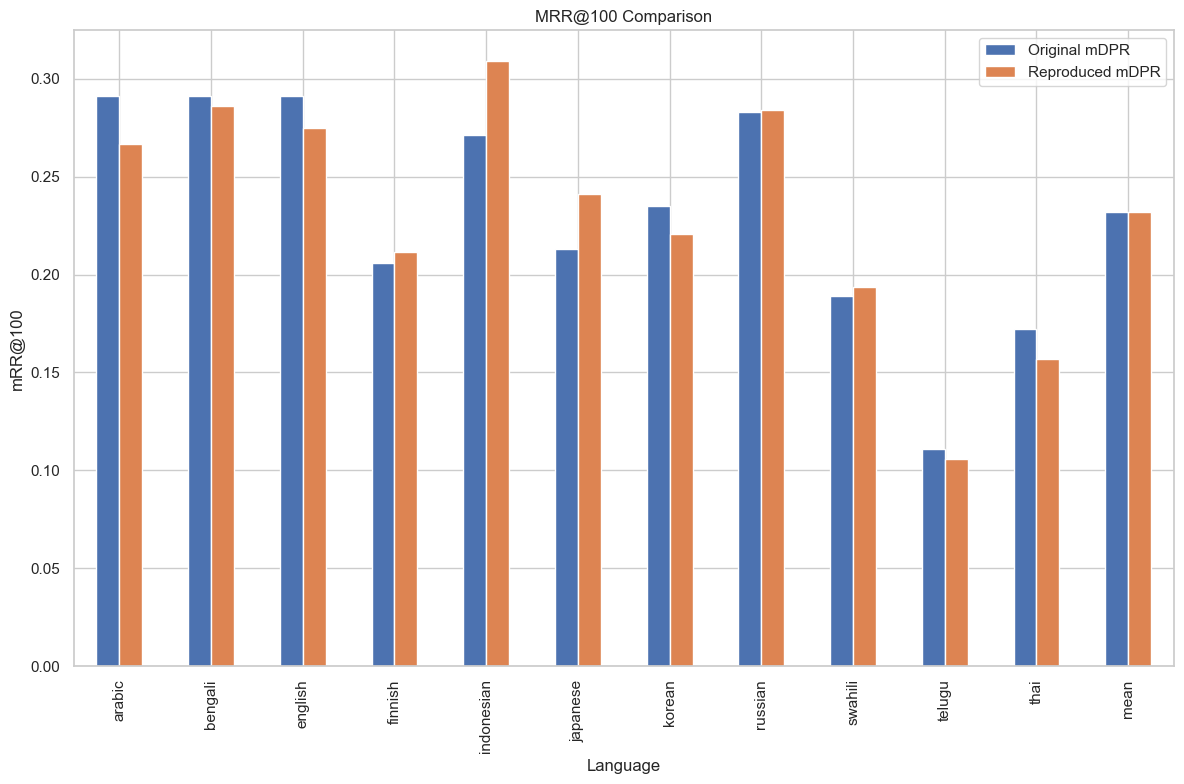

In [317]:

df[['mrr_original', 'mrr_mdpr']].plot.bar()

plt.title("MRR@100 Comparison")
plt.legend(["Original mDPR", "Reproduced mDPR"])

plt.ylabel("mRR@100")
plt.xlabel("Language")
plt.tight_layout()
plt.savefig("plots/mrr_comparison_mdpr.png", dpi=300)

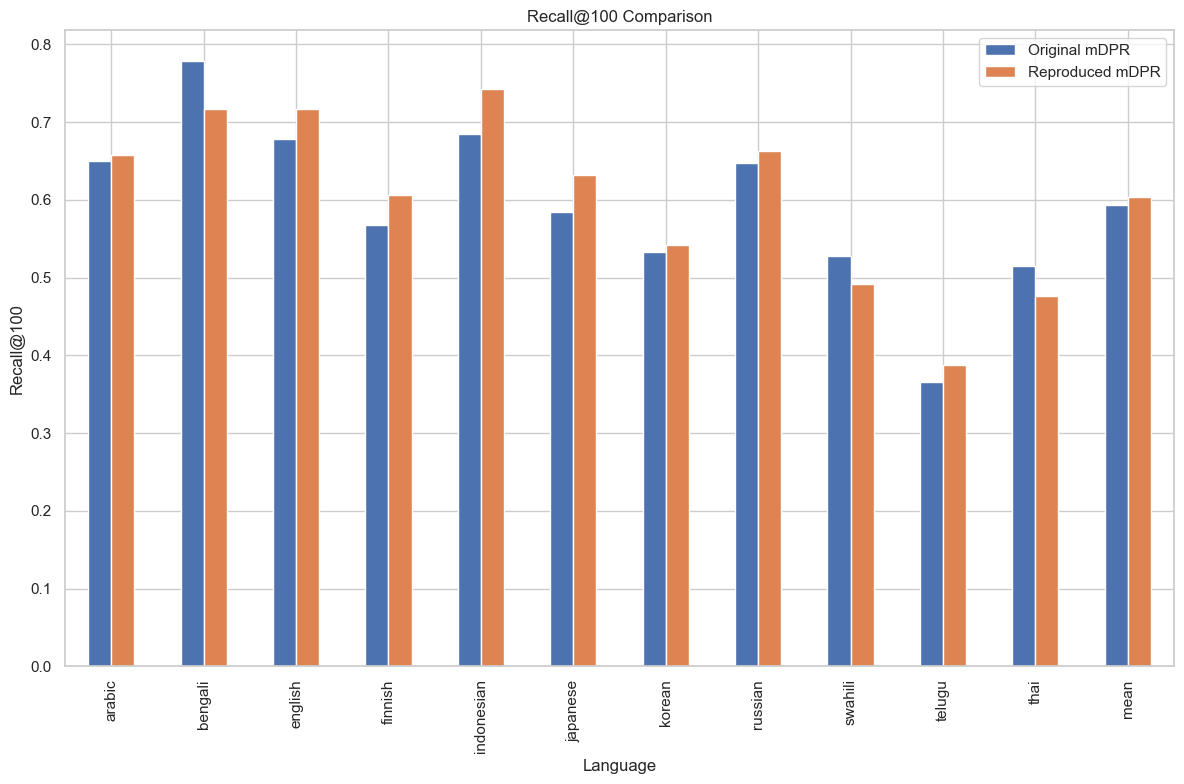

In [318]:
df[['recall_original', 'recall_mdpr']].plot.bar()
plt.title("Recall@100 Comparison")
plt.legend(["Original mDPR", "Reproduced mDPR"])

plt.ylabel("Recall@100")
plt.xlabel("Language")
plt.tight_layout()
plt.savefig("plots/recall_comparison_mdpr.png", dpi=300)

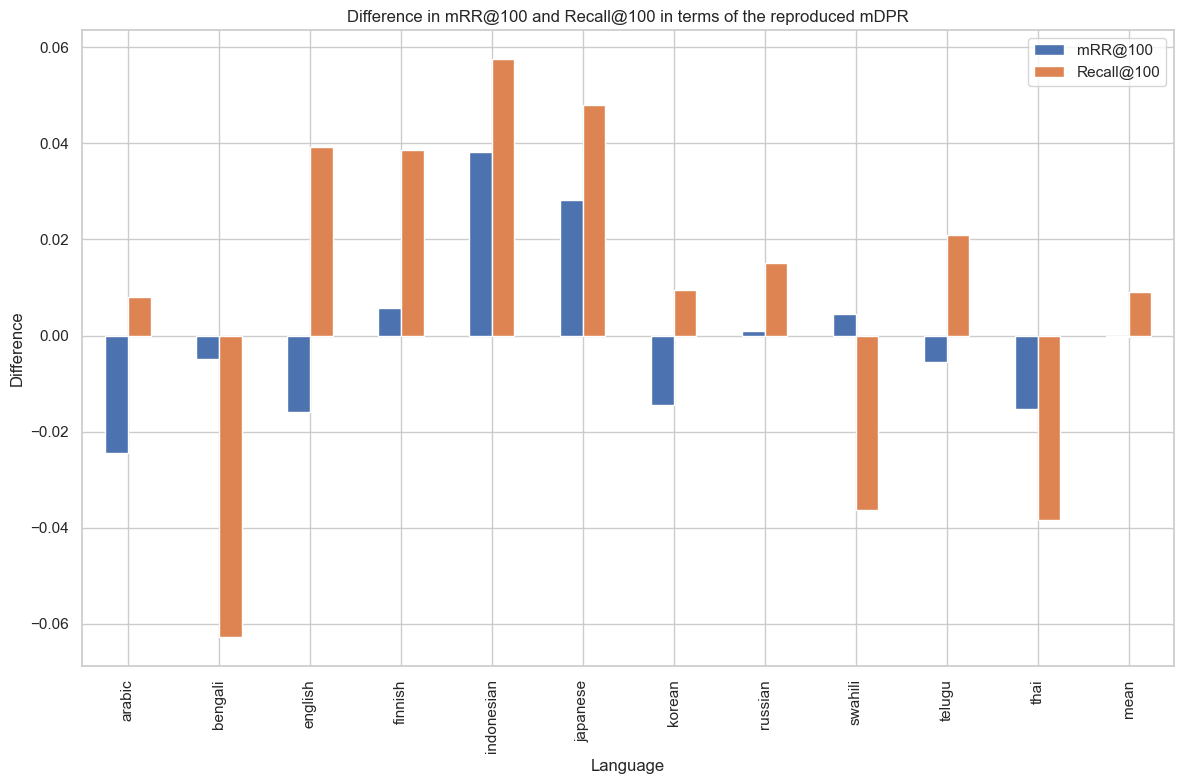

In [319]:
df_difference[['mrr_difference_mdpr_better', 'recall_difference_mdpr_better']].plot.bar()
plt.title("Difference in mRR@100 and Recall@100 in terms of the reproduced mDPR")
plt.legend(["mRR@100", "Recall@100"])

plt.ylabel("Difference")
plt.xlabel("Language")
plt.tight_layout()

plt.savefig("plots/difference_comparison_mdpr.png", dpi=300)

In [320]:
df.to_csv("results_mdpr.csv")
df_difference.to_csv("results_difference_mdpr.csv")

# Hybrid comparison

In [321]:
mrr_hybrid_original = {
    "arabic": 0.500,
    "bengali": 0.555,
    "english": 0.328,
    "finnish": 0.377,
    "indonesian": 0.481,
    "japanese": 0.360,
    "korean": 0.361,
    "russian": 0.455,
    "swahili": 0.415,
    "telugu": 0.418,
    "thai": 0.507
}

In [322]:
recall_hybrid_original = {
    "arabic": 0.871,
    "bengali": 0.946,
    "english": 0.793,
    "finnish": 0.827,
    "indonesian": 0.900,
    "japanese": 0.794,
    "korean": 0.718,
    "russian": 0.815,
    "swahili": 0.808,
    "telugu": 0.823,
    "thai": 0.883
}

In [323]:
alphas_original = {
    "arabic": 0.77,
    "bengali": 0.71,
    "english": 1.0,
    "finnish": 0.77,
    "indonesian": 0.9,
    "japanese": 0.99,
    "korean": 1.0,
    "russian": 0.93,
    "swahili": 0.56,
    "telugu": 0.73,
    "thai": 0.84,
}

In [324]:
mrr_hybrid_mdpr = {
    "arabic": 0.5009,
    "bengali": 0.5379,
    "english": 0.3297,
    "finnish": 0.3912,
    "indonesian": 0.5006,
    "japanese": 0.3793,
    "korean": 0.3707,
    "russian": 0.4560,
    "swahili": 0.4065,
    "telugu": 0.3840,
    "thai": 0.4971
}

In [325]:
recall_hybrid_mdpr = {
    "arabic": 0.8747,
    "bengali": 0.9279,
    "english": 0.8302,
    "finnish": 0.8444,
    "indonesian": 0.9067,
    "japanese": 0.8157,
    "korean": 0.7205,
    "russian": 0.8250,
    "swahili": 0.8201,
    "telugu": 0.8034,
    "thai": 0.8847
}

In [326]:
alphas_mdpr = {
    "arabic": 0.81,
    "bengali": 0.82,
    "english": 0.95,
    "finnish": 0.8,
    "indonesian": 0.85,
    "japanese": 0.97,
    "korean": 0.86,
    "russian": 0.98,
    "swahili": 0.85,
    "telugu": 0.73,
    "thai": 0.82
}

In [327]:
# put all into pd dataframe
df_hybrid = pd.DataFrame({
    "mrr_hybrid_original": mrr_hybrid_original,
    "mrr_hybrid_mdpr": mrr_hybrid_mdpr,
    "recall_hybrid_original": recall_hybrid_original,
    "recall_hybrid_mdpr": recall_hybrid_mdpr,
    "alphas_original": alphas_original,
    "alphas_mdpr": alphas_mdpr
})

In [328]:
df_hybrid

,mrr_hybrid_original,mrr_hybrid_mdpr,recall_hybrid_original,recall_hybrid_mdpr,alphas_original,alphas_mdpr
arabic,0.500,0.5009,0.871,0.8747,0.77,0.81
bengali,0.555,0.5379,0.946,0.9279,0.71,0.82
english,0.328,0.3297,0.793,0.8302,1.00,0.95
finnish,0.377,0.3912,0.827,0.8444,0.77,0.80
indonesian,0.481,0.5006,0.900,0.9067,0.90,0.85
japanese,0.360,0.3793,0.794,0.8157,0.99,0.97
korean,0.361,0.3707,0.718,0.7205,1.00,0.86
russian,0.455,0.4560,0.815,0.8250,0.93,0.98
swahili,0.415,0.4065,0.808,0.8201,0.56,0.85
telugu,0.418,0.3840,0.823,0.8034,0.73,0.73


In [329]:
df_hybrid.describe()

,mrr_hybrid_original,mrr_hybrid_mdpr,recall_hybrid_original,recall_hybrid_mdpr,alphas_original,alphas_mdpr
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.432455,0.432173,0.834364,0.841209,0.836364,0.858182
std,0.072703,0.068630,0.062139,0.056840,0.142287,0.078079
min,0.328000,0.329700,0.718000,0.720500,0.560000,0.730000
25%,0.369000,0.381650,0.801000,0.817900,0.750000,0.815000
50%,0.418000,0.406500,0.823000,0.830200,0.840000,0.850000
75%,0.490500,0.498850,0.877000,0.879700,0.960000,0.905000
max,0.555000,0.537900,0.946000,0.927900,1.000000,0.980000


In [330]:
df_hybrid.loc["mean"] = df_hybrid.mean()

## Differences

In [331]:
df_hybrid_difference = pd.DataFrame({
    "mrr_difference_hybrid_mdpr_better": df_hybrid['mrr_hybrid_mdpr'] - df_hybrid['mrr_hybrid_original'],
    "recall_difference_hybrid_mdpr_better": df_hybrid['recall_hybrid_mdpr'] - df_hybrid['recall_hybrid_original'],
    "alphas_compared_to_original": df_hybrid['alphas_mdpr'] - df_hybrid['alphas_original']
})

In [332]:
df_hybrid_difference

,mrr_difference_hybrid_mdpr_better,recall_difference_hybrid_mdpr_better,alphas_compared_to_original
arabic,0.000900,0.003700,0.040000
bengali,-0.017100,-0.018100,0.110000
english,0.001700,0.037200,-0.050000
finnish,0.014200,0.017400,0.030000
indonesian,0.019600,0.006700,-0.050000
japanese,0.019300,0.021700,-0.020000
korean,0.009700,0.002500,-0.140000
russian,0.001000,0.010000,0.050000
swahili,-0.008500,0.012100,0.290000
telugu,-0.034000,-0.019600,0.000000


In [333]:
df_hybrid_difference.describe()

,mrr_difference_hybrid_mdpr_better,recall_difference_hybrid_mdpr_better,alphas_compared_to_original
count,12.000000,12.000000,12.000000
mean,-0.000282,0.006845,0.021818
std,0.015594,0.015574,0.105038
min,-0.034000,-0.019600,-0.140000
25%,-0.008850,0.002300,-0.027500
50%,0.000950,0.006773,0.010909
75%,0.010825,0.013425,0.042500
max,0.019600,0.037200,0.290000


In [334]:
df_hybrid_difference.loc["mean"] = df_hybrid_difference.mean()

## Plots

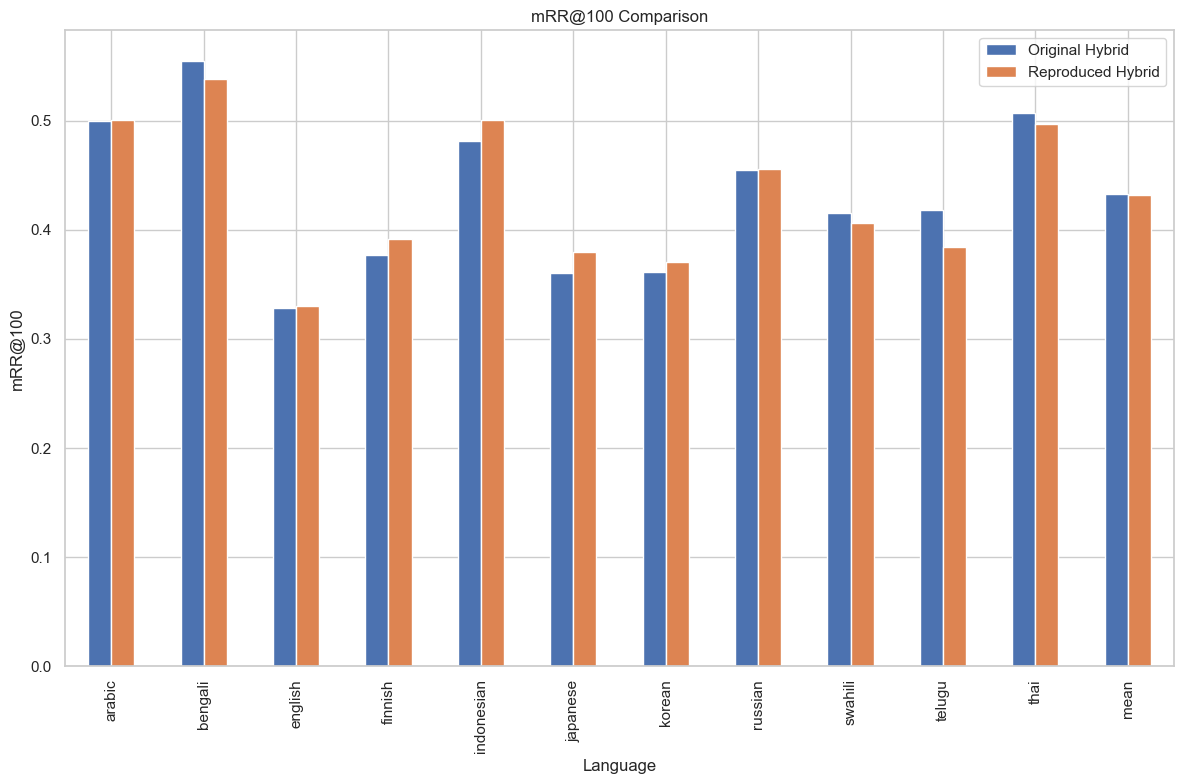

In [335]:
df_hybrid[['mrr_hybrid_original', 'mrr_hybrid_mdpr']].plot.bar()
plt.title("mRR@100 Comparison")
plt.legend(["Original Hybrid", "Reproduced Hybrid"])

plt.ylabel("mRR@100")
plt.xlabel("Language")
plt.tight_layout()
plt.savefig("plots/mrr_comparison_hybrid.png", dpi=300)

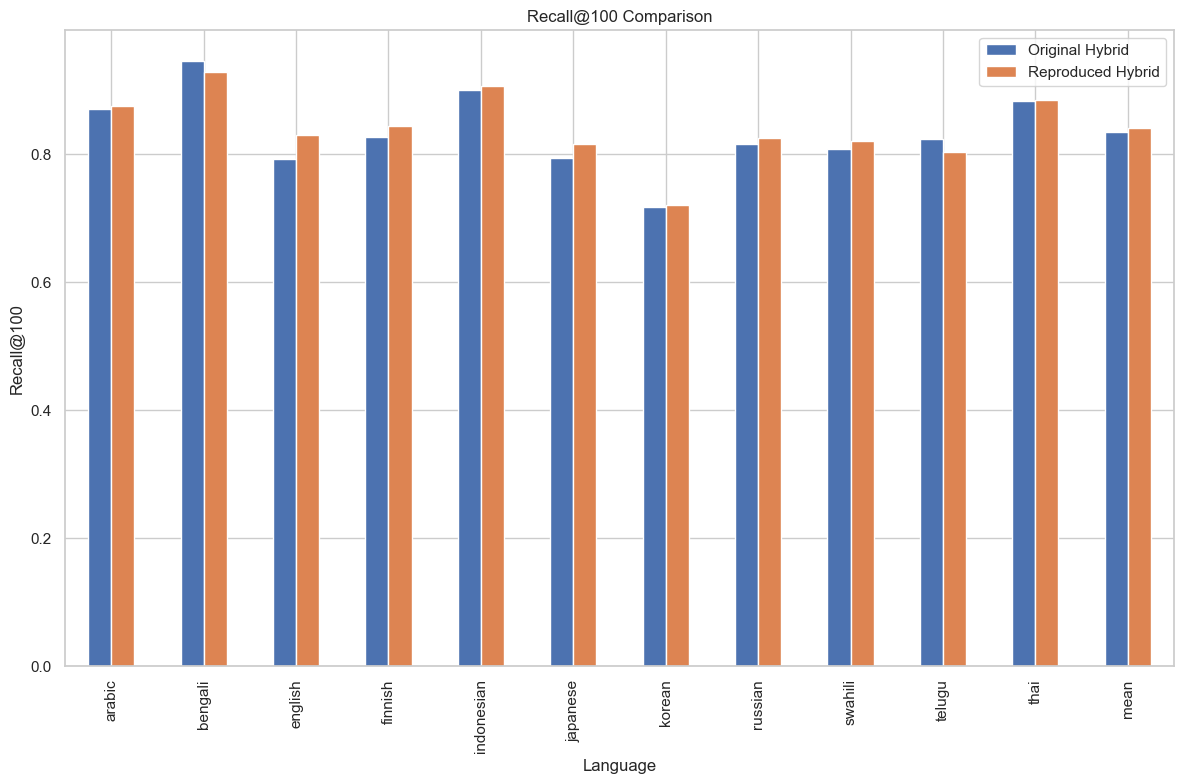

In [336]:
df_hybrid[['recall_hybrid_original', 'recall_hybrid_mdpr']].plot.bar()
plt.title("Recall@100 Comparison")

plt.legend(["Original Hybrid", "Reproduced Hybrid"])
plt.ylabel("Recall@100")
plt.xlabel("Language")
plt.tight_layout()
plt.savefig("plots/recall_comparison_hybrid.png", dpi=300)

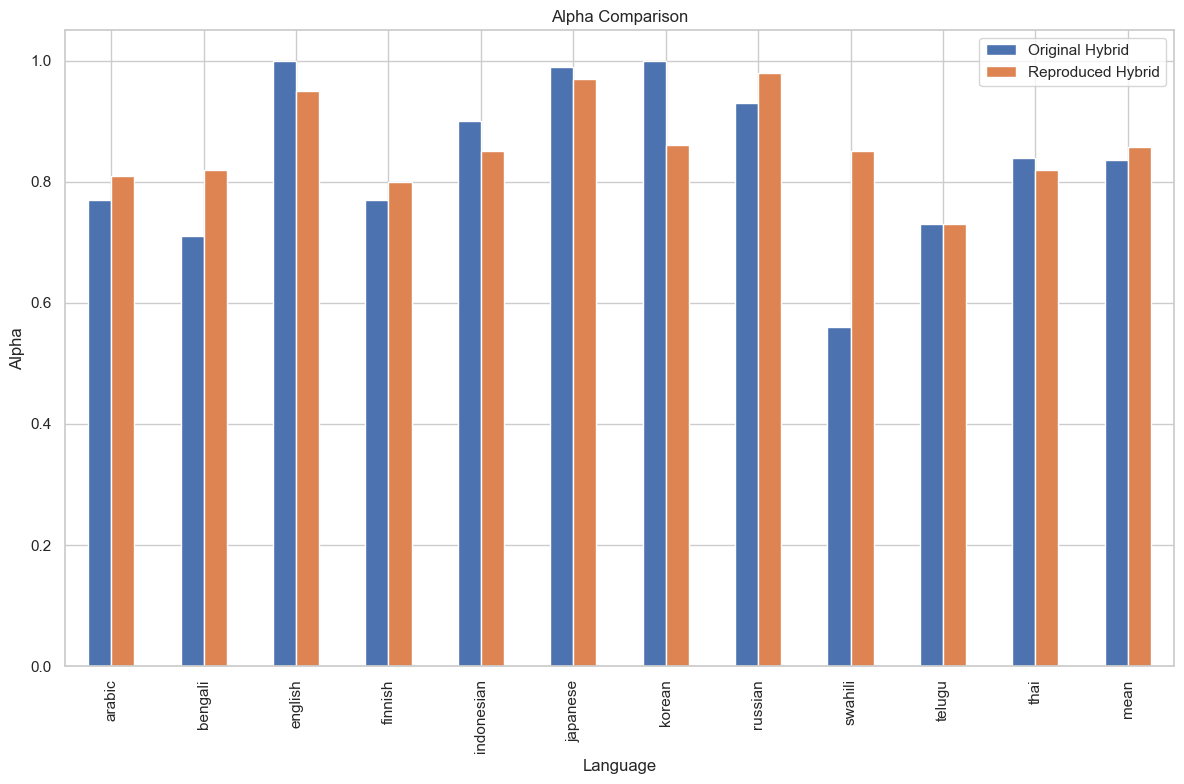

In [337]:
df_hybrid[['alphas_original', 'alphas_mdpr']].plot.bar()
plt.title("Alpha Comparison")

plt.legend(["Original Hybrid", "Reproduced Hybrid"])
plt.ylabel("Alpha")
plt.xlabel("Language")
plt.tight_layout()
plt.savefig("plots/alpha_comparison_hybrid.png", dpi=300)

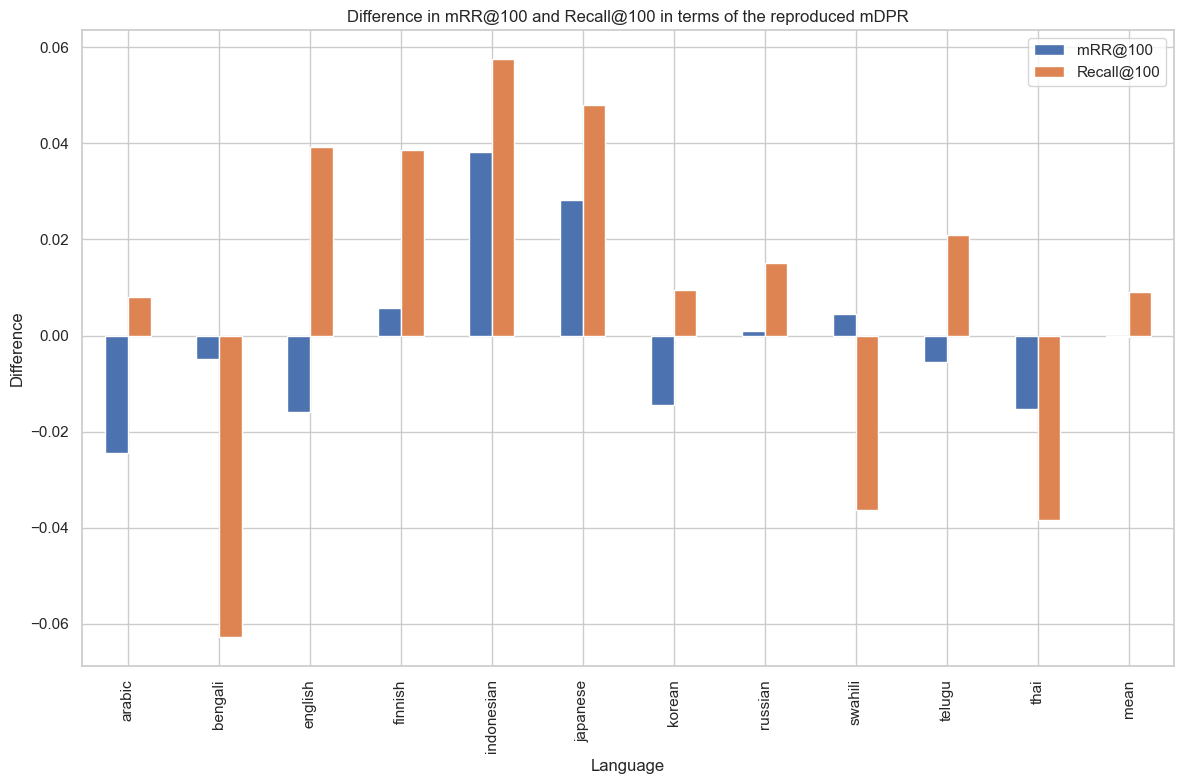

In [338]:
df_difference[['mrr_difference_mdpr_better', 'recall_difference_mdpr_better']].plot.bar()
plt.title("Difference in mRR@100 and Recall@100 in terms of the reproduced mDPR")
plt.legend(["mRR@100", "Recall@100"])

plt.ylabel("Difference")
plt.xlabel("Language")
plt.tight_layout()

plt.savefig("plots/difference_comparison_mdpr.png", dpi=300)

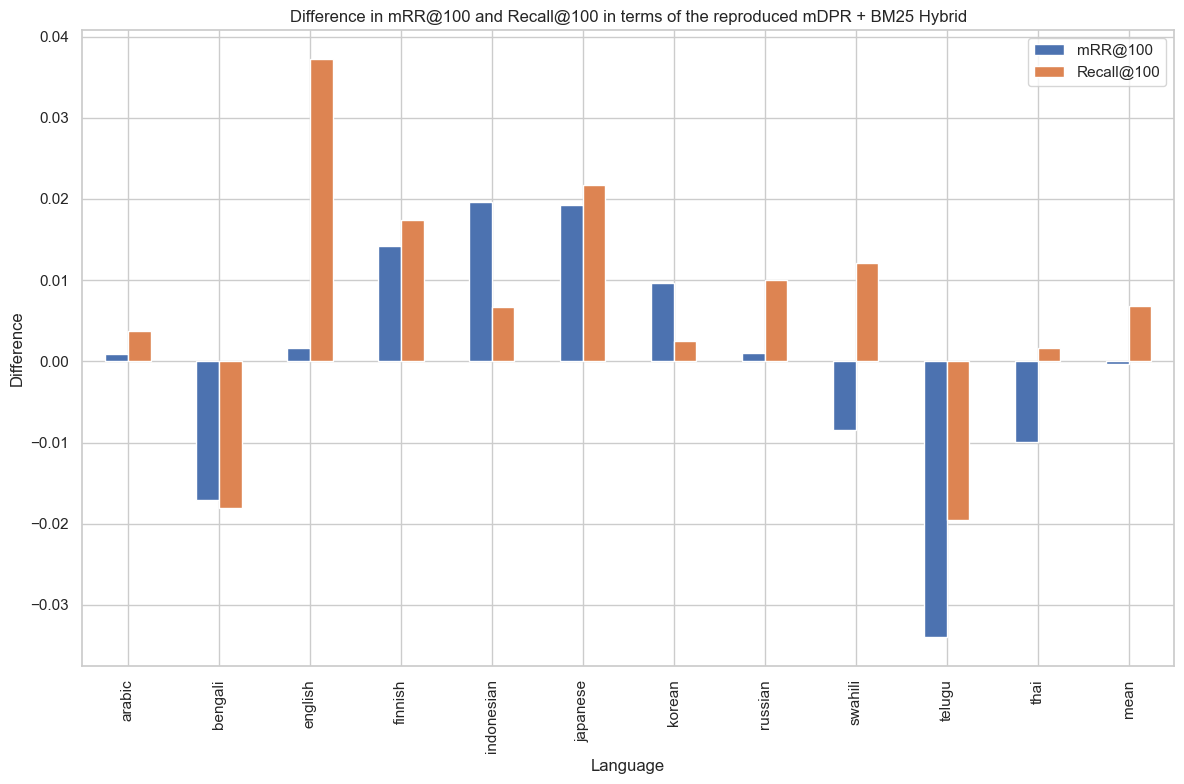

In [339]:
df_hybrid_difference[['mrr_difference_hybrid_mdpr_better', 'recall_difference_hybrid_mdpr_better']].plot.bar()
plt.title("Difference in mRR@100 and Recall@100 in terms of the reproduced mDPR + BM25 Hybrid")

plt.legend(["mRR@100", "Recall@100"])

plt.ylabel("Difference")
plt.xlabel("Language")
plt.tight_layout()

plt.savefig("plots/difference_comparison_hybrid.png", dpi=300)

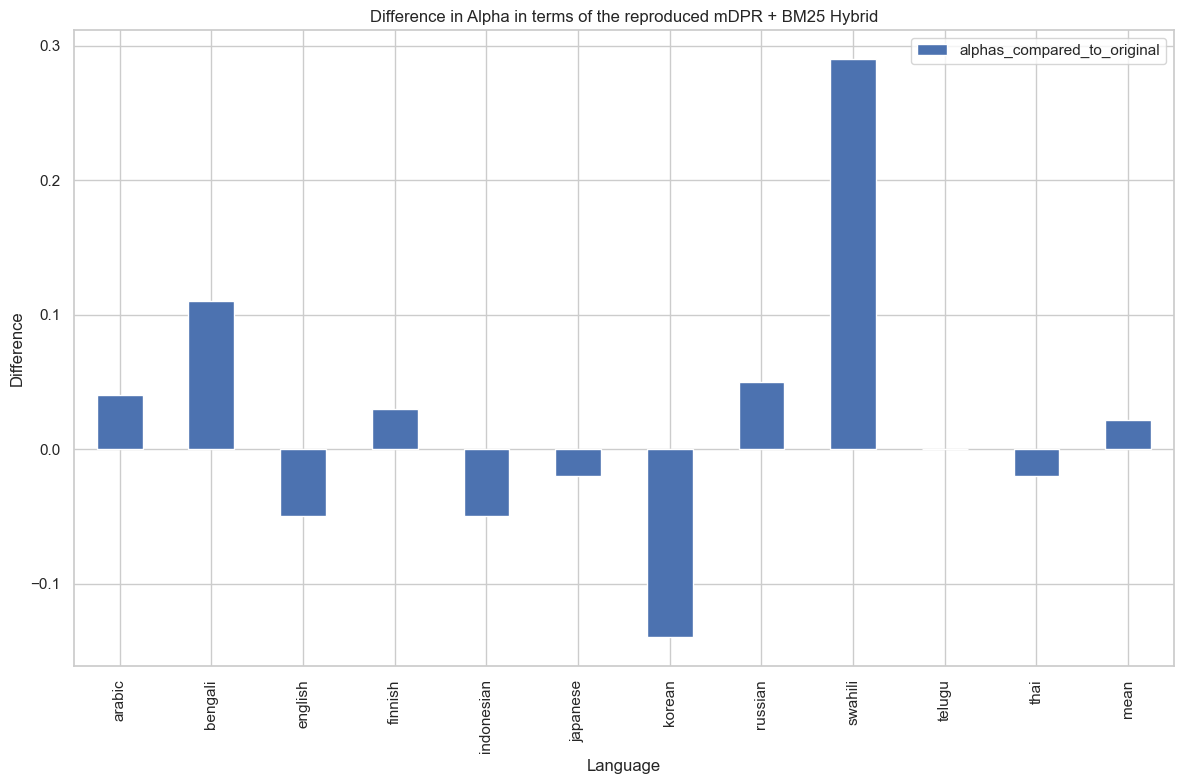

In [340]:
df_hybrid_difference[['alphas_compared_to_original']].plot.bar()
plt.title("Difference in Alpha in terms of the reproduced mDPR + BM25 Hybrid")

plt.ylabel("Difference")
plt.xlabel("Language")
plt.tight_layout()

plt.savefig("plots/difference_comparison_alpha.png", dpi=300)

In [341]:
df_hybrid.to_csv("results_mdpr_hybrid.csv")
df_hybrid_difference.to_csv("results_mdpr_hybrid_difference.csv")